# A quick introduction to machine learning

**Author:** [Leonardo Uieda](https://www.leouieda.com/)
    
This notebook is meant as a very brief hands-on introduction to machine learning. It will cover some of the common nomenclature, principles, and applications. It's designed to be taught as a 1-2 hour session with live-coding.

## Learner profile

* Is currently in their final year of a STEM undergraduate degree or early years of a postgraduate degree.
* Has studies the basics of statistics, Python programming, and linear algebra.
* Is interested in using machine learning in their projects or as a future career.

## What is ML?

Some features of machine learning (from my personal point of view):

* Focus on practical problems
* Learning from data and making predictions
* Overlap with statistics and optimization
* Computational approach

**Oversimplified summary:** Fit a mathematical model to data and use it to make predictions.

## Glossary 

<dl>
    <dt>model</dt>
    <dd>Mathematical formula used to approximate the data</dd>
    <dt>parameters</dt>
    <dd>Variables that define the model and control its behavior</dd>
    <dt>labels/classes</dt>
    <dd>Quantity/category that we want to predict</dd>
    <dt>features</dt>
    <dd>Measurements (information) used as predictors of labels/classes</dd>
    <dt>training</dt>
    <dd>Using features and known labels/classes to fit the model (estimate its parameters)</dd>
    <dt>hyper-parameters</dt>
    <dd>Variables that influence the training and the model but are not estimated during training</dd>
    <dt>unsupervised learning</dt>
    <dd>Extract information and structure from the data without "training". Examples: clustering, principal component analysis.</dd>
    <dt>supervised learning</dt>
    <dd>Fit a model using data to "train" it for making predictions. Examples: regression, classification, spam detection, recommendation systems</dd>
</dl>


**Disclaimer:** I'm not an ML researcher. Don't quote me on this.

## Libraries

In Python, the main tool used for machine learning is [scikit-learn](https://scikit-learn.org/). We'll use it and some of the other scientific Python *stack* to play with some data as we work through the core principles of machine learning.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, neighbors, decomposition, cluster

## Data

Sample data. Talk about the format expected `X, y`. Challenges of getting data into that format.

In [12]:
digits = datasets.load_digits()
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [3]:
digits.images[42]

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  2., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  6., 11.,  5., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

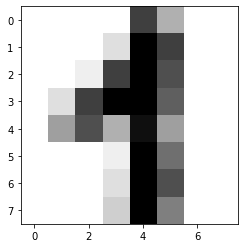

In [4]:
plt.imshow(digits.images[42], cmap="gray_r")

In [5]:
digits.target[42]

1

In [6]:
y = digits.target

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
X = digits.images.reshape((1797, 64))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
X.shape

(1797, 64)

In [10]:
assert np.all(X[42, :] == digits.images[42].ravel()), "Data doesn't match"

In [15]:
digits_table = pd.DataFrame(X)
digits_table

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
sns.pairplot(digits_table)

KeyboardInterrupt: 

## Unsupervised learning: Finding patterns in the data

Show how PCA and other things can be used with the dataset. Maybe clustering and cross-plots.

## Supervised learning: Training models for prediction

Train a model on our data for classification. Maybe show how the behaviour is different when using PCA and not.

## Validation: How good are our predictions?

Talk about validation and cross-validation.

## Summary

Summarize the main take home messages.

## Further reading

What to look into for the future.

Feature selection and standardization.

Transform videos.

Scikit-learn docs

Jake's video tutorial.

---

## License

> This work is based on this excelled tutorial by Jake VanderPlas: https://github.com/jakevdp/sklearn_tutorial

All Python source code is made available under the BSD 3-clause license. You
can freely use and modify the code, without warranty, so long as you provide
attribution to the authors.

Unless otherwise specified, all figures and Jupyter notebooks are available
under the Creative Commons Attribution 4.0 License (CC-BY).

The full text of these licenses is provided in the [`LICENSE.txt`](LICENSE.txt)
file.